## Lecture 4

### Pandas

In the previous lecture we saw the package `numpy`. `numpy` is fantastic for dealing with numerical data.

`pandas` is a package for dealing with *structured* data of mixed type. A common form of *structured data* is tabular, or spreadsheet data, where each column stores a different type of data (e.g. strings, dates, numerical values).

Rule of thumb: Whenever you reach for an Excel spreadsheet, you should strongly consider using `pandas` instead!

Let's get started with some data!

This example is adapted from Wes McKinney's excellent book "Python for Data Analysis"

MovieLens Latest Data - 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. 

https://grouplens.org/datasets/movielens/

In [1]:
%%sh
wget http://files.grouplens.org/datasets/movielens/ml-1m.zip

--2021-09-17 06:38:58--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

     0K .......... .......... .......... .......... ..........  0%  180K 32s
    50K .......... .......... .......... .......... ..........  1%  276K 26s
   100K .......... .......... .......... .......... ..........  2%  979K 19s
   150K .......... .......... .......... .......... ..........  3%  346K 18s
   200K .......... .......... .......... .......... ..........  4% 1.53M 15s
   250K .......... .......... .......... .......... ..........  5%  212K 17s
   300K .......... .......... .......... .......... ..........  6% 2.85M 15s
   350K .......... .......... .......... .......... ..........  6%  665K 14s
   400K .......... .......... ..

In [2]:
import zipfile
with zipfile.ZipFile("ml-1m.zip","r") as f:
    f.extractall(".")

In [3]:
%ls

01_getting_up_and_running.ipynb  04_plotting.txt             07_classes.ipynb
02_some_basics.ipynb             05_pandas.ipynb             ml-1m/
03_numpy.ipynb                   06_writing_robust_code.txt  ml-1m.zip


In [4]:
%cd ml-1m/

/opt/notebooks/notebooks/ml-1m


In [5]:
%ls

README  movies.dat  ratings.dat  users.dat


In [6]:
%cat README

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

Let's read in the data from the `ratings.csv` file. pandas has tools that make reading data from CSV (comma-seperated value) files straightforward.

In [7]:
import pandas as pd
import numpy as np
ratings_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv("ratings.dat", sep='::', header=None, engine='python', names=ratings_names)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [8]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [44]:
users_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv("users.dat", sep='::', header=None, engine='python', names=users_names)
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [10]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


* *Exercise*. Look in the `README` file. Understand the columns in the `movies.dat` file. Read in the file into a variables `movies`.

In [11]:
movies_names = ['movie_id', 'title', 'genres']
movies = pd.read_csv("movies.dat", sep='::', header=None, engine='python', names=movies_names)

In [12]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Things to note:

* Each rating is tied to a single user by the `user_id`.
* Each rating is tied to a single movie by the `movie_id`.

We can use the `pandas.merge` function to join these seperate dataframes together.

*Important:* The merge is specified automatically by matching shared labels between the dataframes. `movie_id` and `Movie_id` will not match!

In [13]:
data = pd.merge(pd.merge(ratings, users), movies)

In [14]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


## Slicing and selecting data

pandas supports similar slicing and boolean operations on data as numpy.

Select the first 5 rows of the `gender` column.

In [15]:
data["gender"][:5]

0    F
1    M
2    M
3    M
4    M
Name: gender, dtype: object

Select all ratings from user number 3663.

In [16]:
data[data["user_id"] == 3663]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
8641,3663,1287,4,966410744,F,35,9,17055,Ben-Hur (1959),Action|Adventure|Drama
32102,3663,1721,5,966410583,F,35,9,17055,Titanic (1997),Drama|Romance
48559,3663,260,3,966410744,F,35,9,17055,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
64046,3663,648,5,966411209,F,35,9,17055,Mission: Impossible (1996),Action|Adventure|Mystery
69483,3663,2916,4,966410942,F,35,9,17055,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...,...,...,...,...
870595,3663,2468,3,966411433,F,35,9,17055,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller
875803,3663,3404,1,966411003,F,35,9,17055,Titanic (1953),Action|Drama
877812,3663,170,4,966411096,F,35,9,17055,Hackers (1995),Action|Crime|Thriller
916857,3663,2457,5,966410898,F,35,9,17055,Running Scared (1986),Action|Comedy


* *Exercise*: Select all ratings made by women.

In [17]:
data[data["gender"] == "F"]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
19,59,1193,4,977934292,F,50,1,55413,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000199,5334,3382,5,960796159,F,56,13,46140,Song of Freedom (1936),Drama
1000200,5420,1843,3,960156505,F,1,19,14850,Slappy and the Stinkers (1998),Children's|Comedy
1000201,5433,286,3,960240881,F,35,17,45014,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000202,5494,3530,4,959816296,F,35,17,94306,Smoking/No Smoking (1993),Comedy


* *Exercise*: Select all *movies* that are of genres *Drama*.
  * Hint: Try the `.str.contains()` method.

In [ ]:
movies[movies['genres'].str.contains('Drama')][:20]

* *Exercise*: Select all *movies* that are of *only* of genres *Drama*.
  * Hint: Use boolean selection.

In [18]:
movies[movies['genres'] == "Drama"]

,movie_id,title,genres
13,14,Nixon (1995),Drama
25,26,Othello (1995),Drama
26,27,Now and Then (1995),Drama
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama
30,31,Dangerous Minds (1995),Drama
...,...,...,...
3845,3915,Girlfight (2000),Drama
3846,3916,Remember the Titans (2000),Drama
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama


## Grouping data

Sometimes it is useful to *group* data together by some common element. For example, say we want to group all of the ratings by title and count how many ratings there are for each title.

In [22]:
num_ratings_by_title = data.groupby('title').size()
num_ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [ ]:
num_ratings_by_title.sort_values(ascending=False)[:10]

*Exercise*: Show the user ids of the top 100 users who rated the most movies. Assign the result to `users_with_time`.
Tips: Use `groupby`, `sort_values`, `size`, slicing on `data`. Try writing it in one line!

(array([86., 91., 77., 81., 81., 75., 62., 66., 60., 72., 58., 51., 55.,
        62., 44., 58., 71., 55., 49., 49., 48., 48., 35., 48., 40., 40.,
        46., 55., 51., 29.]),
 array([20.        , 20.96666667, 21.93333333, 22.9       , 23.86666667,
        24.83333333, 25.8       , 26.76666667, 27.73333333, 28.7       ,
        29.66666667, 30.63333333, 31.6       , 32.56666667, 33.53333333,
        34.5       , 35.46666667, 36.43333333, 37.4       , 38.36666667,
        39.33333333, 40.3       , 41.26666667, 42.23333333, 43.2       ,
        44.16666667, 45.13333333, 46.1       , 47.06666667, 48.03333333,
        49.        ]),
 <a list of 30 Patch objects>)

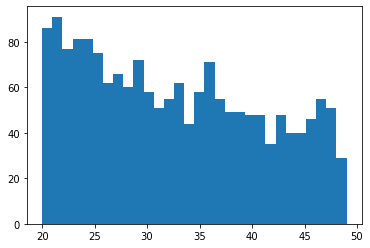

In [38]:
users_ids_with_time = data.groupby('user_id').size().sort_values(ascending=False)[:100]

import matplotlib.pyplot as plt
users_num_ratings = data.groupby('user_id').size()[data.groupby('user_id').size() < 50]
plt.hist(users_num_ratings.values, bins=30)

Let's find out about these people who can watch so many movies! What jobs do they have?

First of all, the original table only contains numbers which *map* to occupations. It would be nice to have the occupations rather than the numbers.

In [39]:
number_to_occupation = {0:  "other or not specified",
1: "academic/educator",
2: "artist",
3: "clerical/admin",
4: "college/grad student",
5: "customer service",
6: "doctor/health care",
7: "executive/managerial",
8: "farmer",
9: "homemaker",
10: "K-12 student",
11: "lawyer",
12: "programmer",
13: "retired",
14: "sales/marketing",
15: "scientist",
16: "self-employed",
17: "technician/engineer",
18: "tradesman/craftsman",
19: "unemployed",
20: "writer"}

In [45]:
users['occupation'] = users['occupation'].map(number_to_occupation)
users

,user_id,gender,age,occupation,zip
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455
...,...,...,...,...,...
6035,6036,F,25,scientist,32603
6036,6037,F,45,academic/educator,76006
6037,6038,F,56,academic/educator,14706
6038,6039,F,45,other or not specified,01060


In [46]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


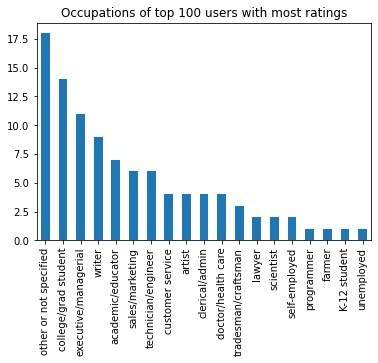

In [47]:
# Simplify into multiple steps
users_with_time = users[users["user_id"].isin(users_ids_with_time.index)]
(users_with_time['occupation'].value_counts()).plot(kind='bar', title="Occupations of top 100 users with most ratings")

* *Exercise*: Perform a similar analysis, but look at whether there are more male or female users in the top 100. Generate a plot.
  * Hint: Start with `users_with_time`. Use `value_counts`. Use the `.plot()` method.

In [49]:
users_with_time.head()

,user_id,gender,age,occupation,zip
351,352,M,18,college/grad student,60115
423,424,M,25,technician/engineer,55112
481,482,M,25,sales/marketing,55305
523,524,M,18,other or not specified,91320
530,531,F,18,sales/marketing,22206


In [48]:
count_gender_of_users_with_time = users_with_time["gender"].value_counts()
print(count_gender_of_users_with_time)

M    80
F    20
Name: gender, dtype: int64


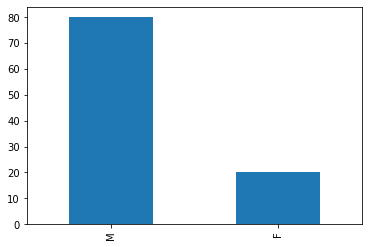

In [50]:
count_gender_of_users_with_time.plot(kind='bar')

## Pivot tables

'Pivot tables' are a concept popularised by Microsoft Excel. 
They are a tool for:
* first *aggregating* data by one or more *keys*, 
* and then arranging the data with some of the *keys* along the rows, and some along the columns.

Question: What is the mean movie rating for each film grouped by gender?

In [ ]:
data.head()

In [51]:
mean_rating = data.pivot_table('rating', index='title', columns='gender', aggfunc=np.mean)
mean_rating.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


* Exercise: Using the `.pivot_table()` method, compute the mean and standard deviation of the aggregated data.
  * Hint: Look at the documentation for the `aggfunc` argument to `pd.pivot_table` using the `?` command.
  * Hint: Find functions in `numpy` (`np`) that compute the mean and standard deviation.
  

In [52]:
pd.pivot_table?
mean_rating["mean"]["F"].sort_values(ascending=False)

In [63]:
mean_rating = data.pivot_table('rating', index='title', 
                               columns='gender', 
                               aggfunc=[len, np.mean, np.std])
mean_rating["mean"]["F"].sort_values(ascending=False)

Lamerica (1994)                                     5.0
Brother, Can You Spare a Dime? (1975)               5.0
Other Side of Sunday, The (S�ndagsengler) (1996)    5.0
Ayn Rand: A Sense of Life (1997)                    5.0
For the Moment (1994)                               5.0
                                                   ... 
With Friends Like These... (1998)                   NaN
Wooden Man's Bride, The (Wu Kui) (1994)             NaN
Year of the Horse (1997)                            NaN
Zachariah (1971)                                    NaN
Zero Kelvin (Kj�rlighetens kj�tere) (1995)          NaN
Name: F, Length: 3706, dtype: float64

## Analysis - Getting answers to questions

Question:

1. Which films were most divisive between male and female viewers?

In [64]:
mean_rating.head()

len             mean                 std  \
gender                            F      M         F         M         F   
$1,000,000 Duck (1971)         16.0   21.0  3.375000  2.761905  0.957427   
'Night Mother (1986)           36.0   34.0  3.388889  3.352941  1.021981   
'Til There Was You (1997)      37.0   15.0  2.675676  2.733333  0.973369   
'burbs, The (1989)             92.0  211.0  2.793478  2.962085  1.124532   
...And Justice for All (1979)  35.0  164.0  3.828571  3.689024  0.954424   

                                         
gender                                M  
$1,000,000 Duck (1971)         1.135991  
'Night Mother (1986)           1.228015  
'Til There Was You (1997)      1.162919  
'burbs, The (1989)             1.099127  
...And Justice for All (1979)  0.862086

In [65]:
mean_rating["mean_diff"] = mean_rating["mean"]["M"] - mean_rating["mean"]["F"]

In [66]:
sorted_by_diff = mean_rating.sort_values(by="mean_diff")

In [67]:
sorted_by_diff[:15]

len            mean  \
gender                                                F     M         F   
James Dean Story, The (1957)                        2.0   1.0  4.000000   
Country Life (1994)                                 1.0   2.0  5.000000   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  2.0   2.0  4.000000   
Babyfever (1994)                                    3.0   1.0  3.666667   
Woman of Paris, A (1923)                            1.0   7.0  5.000000   
Cobra (1925)                                        1.0   4.0  4.000000   
Other Side of Sunday, The (S�ndagsengler) (1996)    2.0  14.0  5.000000   
To Have, or Not (1995)                              1.0   1.0  4.000000   
For the Moment (1994)                               1.0   4.0  5.000000   
Phat Beach (1996)                                   2.0   2.0  3.000000   
Crude Oasis, The (1995)                             1.0   1.0  3.000000   
Coming Apart (1969)                                 1.0   1.0  4.000000   
Separation, The (La S�paration) (1994)              1.0   2.0  4.000000   
Mad Dog Time (1996)                                 1.0  12.0  4.000000   
Theodore Rex (1995)                                 1.0   2.0  3.000000   

                                                                   std  \
gender                                                     M         F   
James Dean Story, The (1957)                        1.000000  0.000000   
Country Life (1994)                                 2.000000       NaN   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  1.000000  1.414214   
Babyfever (1994)                                    1.000000  0.577350   
Woman of Paris, A (1923)                            2.428571       NaN   
Cobra (1925)                                        1.500000       NaN   
Other Side of Sunday, The (S�ndagsengler) (1996)    2.928571  0.000000   
To Have, or Not (1995)                              2.000000       NaN   
For the Moment (1994)                               3.000000       NaN   
Phat Beach (1996)                                   1.000000  0.000000   
Crude Oasis, The (1995)                             1.000000       NaN   
Coming Apart (1969)                                 2.000000       NaN   
Separation, The (La S�paration) (1994)              2.000000       NaN   
Mad Dog Time (1996)                                 2.000000       NaN   
Theodore Rex (1995)                                 1.000000       NaN   

                                                             mean_diff  
gender                                                     M            
James Dean Story, The (1957)                             NaN -3.000000  
Country Life (1994)                                 0.000000 -3.000000  
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  0.000000 -3.000000  
Babyfever (1994)                                         NaN -2.666667  
Woman of Paris, A (1923)                            1.272418 -2.571429  
Cobra (1925)                                        1.000000 -2.500000  
Other Side of Sunday, The (S�ndagsengler) (1996)    1.542440 -2.071429  
To Have, or Not (1995)                                   NaN -2.000000  
For the Moment (1994)                               0.816497 -2.000000  
Phat Beach (1996)                                   0.000000 -2.000000  
Crude Oasis, The (1995)                                  NaN -2.000000  
Coming Apart (1969)                                      NaN -2.000000  
Separation, The (La S�paration) (1994)              1.414214 -2.000000  
Mad Dog Time (1996)                                 1.279204 -2.000000  
Theodore Rex (1995)                                 0.000000 -2.000000

*Exercise:* Take a look at the data in the above table. What is the statistical issue with what we have done?

Answer: Some movies only have one or two ratings! They are not statistically significant. Let's remove movies with only a few ratings.

In [68]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [69]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
print(active_titles)

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)


In [73]:
mean_rating = mean_rating.loc[active_titles]
mean_rating
mean_rating["mean_diff"] = np.abs(mean_rating["mean"]["M"] - mean_rating["mean"]["F"])

In [75]:
sorted_by_mean_diff = mean_rating.sort_values(by="mean_diff")[::-1]
sorted_by_mean_diff

len             mean            \
gender                                      F      M         F         M   
title                                                                      
Dirty Dancing (1987)                    291.0  396.0  3.790378  2.959596   
Good, The Bad and The Ugly, The (1966)   99.0  723.0  3.494949  4.221300   
Kentucky Fried Movie, The (1977)         33.0  272.0  2.878788  3.555147   
Jumpin' Jack Flash (1986)               106.0  268.0  3.254717  2.578358   
Dumb & Dumber (1994)                    149.0  511.0  2.697987  3.336595   
...                                       ...    ...       ...       ...   
Robin Hood: Prince of Thieves (1991)     93.0  251.0  3.161290  3.163347   
Trainspotting (1996)                    195.0  556.0  3.958974  3.960432   
Jerry Maguire (1996)                    451.0  902.0  3.758315  3.759424   
Mystery, Alaska (1999)                   69.0  218.0  3.434783  3.435780   
Tender Mercies (1983)                    74.0  190.0  3.905405  3.905263   

                                             std           mean_diff  
gender                                         F         M            
title                                                                 
Dirty Dancing (1987)                    1.105181  1.087738  0.830782  
Good, The Bad and The Ugly, The (1966)  1.146189  0.814168  0.726351  
Kentucky Fried Movie, The (1977)        1.023400  1.007669  0.676359  
Jumpin' Jack Flash (1986)               1.078459  1.134007  0.676359  
Dumb & Dumber (1994)                    1.354196  1.277333  0.638608  
...                                          ...       ...       ...  
Robin Hood: Prince of Thieves (1991)    1.106211  0.996600  0.002056  
Trainspotting (1996)                    1.039607  1.016202  0.001457  
Jerry Maguire (1996)                    0.912453  0.910413  0.001109  
Mystery, Alaska (1999)                  1.021508  0.934739  0.000997  
Tender Mercies (1983)                   0.981597  0.971266  0.000142  

[1216 rows x 7 columns]

*Exercise*: Which 20 films had the widest difference of opinion?
  * a) amongst males.
  * b) amongst females.
  * c) amongst people.
 
Tips: Start with `mean_rating`. Select the standard deviation column using `["std"]`. Use `.sort_values` with the `by` keyword argument. Reverse using `[start:stop:slice]`.

In [76]:
mean_rating["std"].sort_values(by="M")[-1::-1]

gender,F,M
title,,
"Blair Witch Project, The (1999)",1.313929,1.317775
Natural Born Killers (1994),1.355926,1.298487
Dumb & Dumber (1994),1.354196,1.277333
Tank Girl (1995),1.300054,1.264366
Serial Mom (1994),1.125951,1.257872
...,...,...
Raiders of the Lost Ark (1981),0.792796,0.699111
Rear Window (1954),0.671284,0.696009
"Shawshank Redemption, The (1994)",0.719194,0.693091


In [77]:
mean_rating["std"].sort_values(by="F", ascending=False)[0:20]

gender,F,M
title,,
Soldier (1998),1.374946,1.048801
"South Park: Bigger, Longer and Uncut (1999)",1.373668,1.182896
"Nightmare on Elm Street, A (1984)",1.365397,1.131927
Natural Born Killers (1994),1.355926,1.298487
Dumb & Dumber (1994),1.354196,1.277333
"Clockwork Orange, A (1971)",1.352036,1.037948
Rocky IV (1985),1.342549,1.135562
Bicentennial Man (1999),1.333791,1.219125
Evil Dead II (Dead By Dawn) (1987),1.331697,1.061631


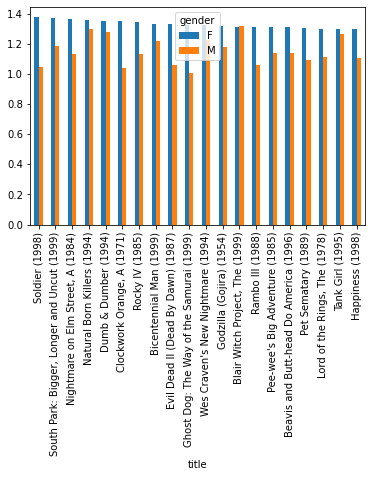

In [78]:
(mean_rating["std"].sort_values(by="F", ascending=False)[0:20]).plot(kind='bar')

In [79]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [100]:
titles = data["title"].values
years = np.zeros(len(titles), dtype=np.int)

for i, title in enumerate(titles):
    years[i] = np.int(title[-2:-6:-1][::-1])

In [101]:
years

array([1975, 1975, 1975, ..., 1999, 1973, 1998])

In [102]:
data["years"] = years

In [103]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,years
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,1998
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,1998
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,1999
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,1973


In [105]:
mean_rating_year = data.pivot_table('rating', index='years', aggfunc=[len,np.mean,np.std])
mean_rating_year

,len,mean,std
,rating,rating,rating
years,,,
1919,45,3.466667,1.035725
1920,24,3.666667,1.307725
1921,62,3.790323,1.073329
1922,238,3.991597,1.098490
1923,17,3.117647,1.495090
...,...,...,...
1996,59382,3.388502,1.143700
1997,65402,3.411654,1.133725


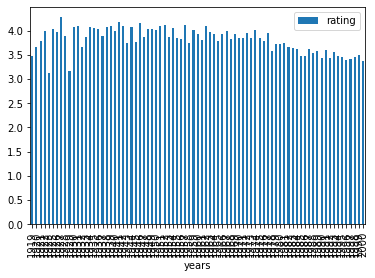

In [108]:
mean_rating_year['mean'].plot(kind="bar")

In [111]:
def title_to_year(title):
    return np.int(title[-2:-6:-1][::-1])

years = data["title"].apply(title_to_year)

In [113]:
years

array([1975, 1975, 1975, ..., 1999, 1973, 1998])